# Todoist Data Analysis

This notebook processed the downloaded history of your todoist tasks. See [todoist_downloader.ipynb](https://github.com/markwk/qs_ledger/blob/master/todoist/todoist_downloader.ipynb) to export and download your task history from Todoist. 

---

In [1]:
from datetime import date, datetime as dt, timedelta as td
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

In [2]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

---

# General Data Analysis of Todoist Tasks

In [3]:
# import raw data
raw_tasks = pd.read_csv("data/todost-raw-tasks-completed.csv")
len(raw_tasks)

5114

In [4]:
# import processed data
tasks = pd.read_csv("data/todost-tasks-completed.csv")
len(tasks)

5114

----

### Simple Data Analysis: Completed Tasks Per Year

In [5]:
year_data = tasks['year'].value_counts().sort_index()

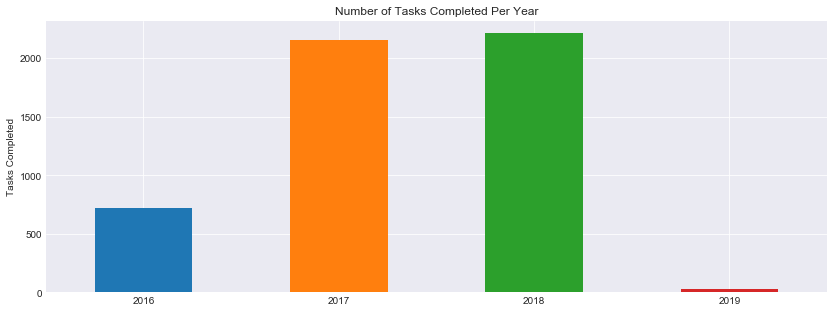

In [6]:
# Chart Monthly Tasks Count 
dataset = year_data
chart_title = 'Number of Tasks Completed Per Year'

plt.style.use('seaborn-darkgrid')
ax = dataset.plot.bar(figsize=(14, 5), rot=0, legend=False)
ax.set_ylabel('Tasks Completed')
ax.set_xlabel('')
ax.set_title(chart_title)
plt.show()

### Simple Data Analysis: Completed Tasks Per Month

In [7]:
# simple breakdown by month
totals_by_month = tasks['month'].value_counts().sort_index()

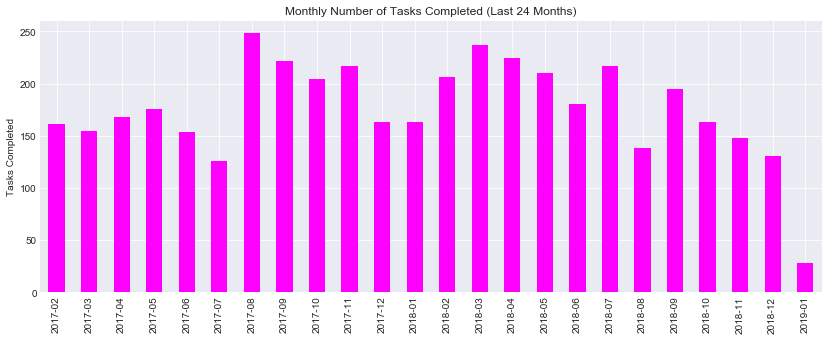

In [8]:
# Chart Monthly Tasks Count 
dataset = totals_by_month.tail(24)
chart_title = 'Monthly Number of Tasks Completed (Last 24 Months)'

plt.style.use('seaborn-darkgrid')
ax = dataset.plot.bar(figsize=(14, 5), rot=90, colormap='spring', stacked=True, legend=False)
ax.set_ylabel('Tasks Completed')
ax.set_xlabel('')
ax.set_title(chart_title)
plt.show()

------

### Simple Data Analysis: Completed Tasks by Day of Week

In [9]:
totals_dow = tasks['dow'].value_counts().sort_index()

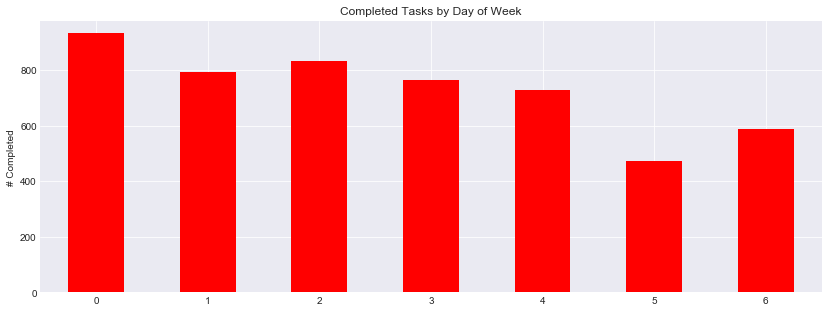

In [10]:
dataset = totals_dow
chart_title = 'Completed Tasks by Day of Week'

plt.style.use('seaborn-darkgrid')
ax = dataset.plot.bar(figsize=(14, 5), rot=0, colormap='autumn', stacked=True, legend=False)
ax.set_ylabel('# Completed')
ax.set_xlabel('')
ax.set_title(chart_title)
plt.show()

-----

### Simple Data Analysis: Completed Tasks by Hour of the Day

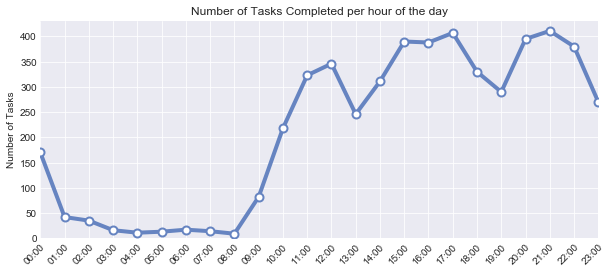

In [11]:
hour_counts = tasks['hour'].value_counts().sort_index()

ax = hour_counts.plot(kind='line', figsize=[10, 4], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

xlabels = hour_counts.index.map(lambda x: '{:02}:00'.format(x))
ax.set_xticks(range(len(xlabels)))
ax.set_xticklabels(xlabels, rotation=45, rotation_mode='anchor', ha='right')

ax.set_xlim((hour_counts.index[0], hour_counts.index[-1]))

ax.yaxis.grid(True)
hour_max = hour_counts.max()
ax.set_ylim((0, hour_max+20))
ax.set_ylabel('Number of Tasks')
ax.set_xlabel('', )
ax.set_title('Number of Tasks Completed per hour of the day', )

plt.show()

----

## Daily Count of Tasks Completed

In [12]:
daily_counts = tasks['date'].value_counts().sort_index()

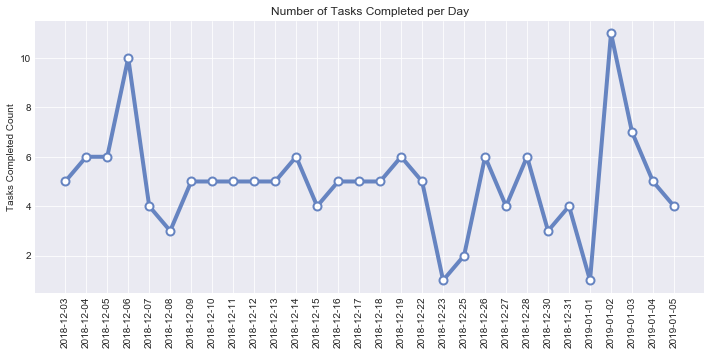

In [13]:
dataset = daily_counts.tail(30)

chart_title = 'Number of Tasks Completed per Day'

n_groups = len(dataset)
index = np.arange(n_groups)

ax = dataset.plot(kind='line', figsize=[12, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

ax.yaxis.grid(True)
ax.xaxis.grid(True)

ax.set_xticks(index)
ax.set_ylabel('Tasks Completed Count')
# ax.set_xlabel('')
plt.xticks(index, dataset.index, rotation=90)
ax.set_title(chart_title)

plt.show()

In [14]:
# Export
daily_counts.to_csv("data/todoist-daily-completed.csv", index=True)

-----

### Projects Breakdown

In [15]:
# Optionally pass a list of projects to exclude
exclude_proj = ['Project1', 'Project2']
tasks_data = tasks[~tasks.project_name.isin(exclude_proj)]
project_counts = tasks_data['project_name'].value_counts().sort_values(ascending=False)

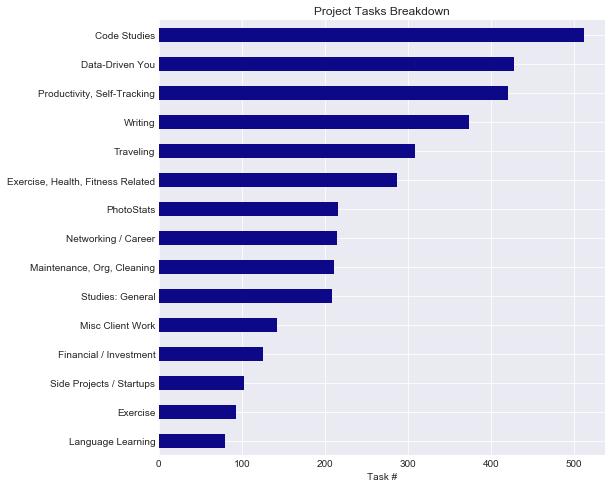

In [16]:
# Chart Project Tasks 
dataset = project_counts.sort_values(ascending=True).tail(15)
chart_title = 'Project Tasks Breakdown'

plt.style.use('seaborn-darkgrid')
ax = dataset.plot.barh(y='Hours', figsize=(8, 8), colormap='plasma', legend=False)
ax.set_ylabel('')
ax.set_xlabel('Task #')

ax.set_title(chart_title)
plt.show()

-----

## General Summary of Todoist Tasks

In [17]:
# Life-time Project Time Summary
print('====== Todoist Lifetime Summary ====== ')
print('Total Tasks Completed: {:,}'.format(len(tasks)))
daily_average = round(daily_counts.mean(),1)
print('Daily Task Average: {:,}'.format(daily_average))
print(' ')
print('Top 5 Days with Most Tasks Completed:')
for i, v in daily_counts.sort_values(ascending=False).head(5).items():
    print(v, 'tasks on ', i)

====== Todoist Lifetime Summary ====== 
Total Tasks Completed: 5,114
Daily Task Average: 6.3
 
Top 5 Days with Most Tasks Completed:
22 tasks on  2016-08-29
20 tasks on  2017-04-24
18 tasks on  2016-10-18
17 tasks on  2016-09-14
15 tasks on  2017-11-08


------

# Year in Review

In [18]:
# Set Year
target_year = 2018

### Year: Top Projects

In [19]:
def yearly_top_projects_chart(year, exclude_projects=[]):  
    year_data = tasks[tasks['year'] == year]
    # Optionally pass a list of projects to exclude
    if exclude_projects:
        exclude_proj = exclude_projects
        year_data = year_data[~tasks.project_name.isin(exclude_proj)]
    project_counts = year_data['project_name'].value_counts().sort_values(ascending=False)
    project_counts = year_data['project_name'].value_counts().sort_values(ascending=False)
    
    # Chart Project Tasks 
    dataset = project_counts.sort_values(ascending=True).tail(10)
    chart_title = '{} Project Tasks Breakdown'.format(year)

    plt.style.use('seaborn-darkgrid')
    ax = dataset.plot.barh(y='Hours', figsize=(8, 8), colormap='plasma', legend=False)
    ax.set_ylabel('')
    ax.set_xlabel('Task #')

    ax.set_title(chart_title)
    plt.show()

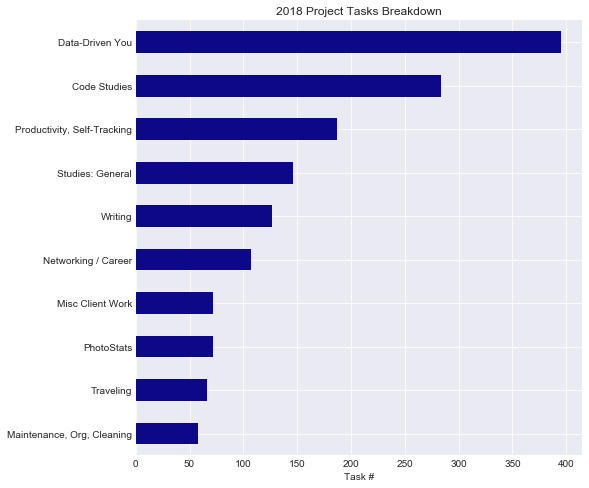

In [21]:
# yearly_top_projects_chart(year=target_year, exclude_projects=['ProjectName', 'ProjectName2''])
yearly_top_projects_chart(year=target_year)

### Year: Day of Week Comparison

In [22]:
def yearly_dow_chart(year):  
    year_data = tasks[tasks['year'] == year]
    yearly_dow = year_data['dow'].value_counts().sort_index()
    days_of_week_list = ['Mon', 'Tues', 'Wed', 'Thurs', 'Friday', 'Sat', 'Sun']
    yearly_dow.index = days_of_week_list
    
    chart_title = '{} Tasks Completed by Day of Week | Yearly Total: {:,}'.format(year, yearly_dow.sum())
    plt.style.use('seaborn-darkgrid')
    ax = yearly_dow.plot.bar(stacked=True, rot=0, figsize=(12,4))
    ax.set_xlabel('')
    ax.set_ylabel('Hours')
    ax.set_title(chart_title)
    plt.show()

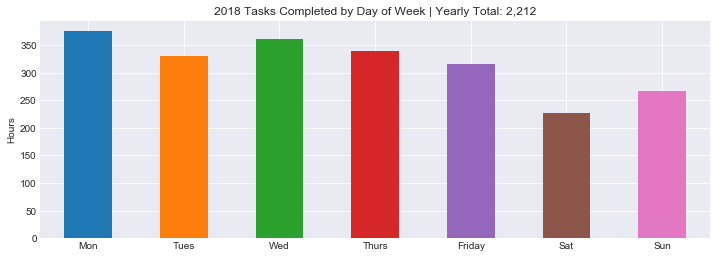

In [23]:
yearly_dow_chart(year=target_year)

### Year: Monthly Tasks Completed Chart

In [24]:
def yearly_months_chart(year):   
    year_data = tasks[tasks['year'] == year]
    yearly_months = year_data['month'].value_counts().sort_index()
    months_of_year = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 
                      'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
    yearly_months.index = months_of_year
    
    # Chart Monthly Tasks Count 
    dataset = yearly_months
    chart_title = 'Monthly Number of Tasks Completed'

    plt.style.use('seaborn-darkgrid')
    ax = dataset.plot.bar(figsize=(14, 5), rot=0, colormap='spring', stacked=True, legend=False)
    ax.set_ylabel('Tasks Completed')
    ax.set_xlabel('')
    ax.set_title(chart_title)
    plt.show()

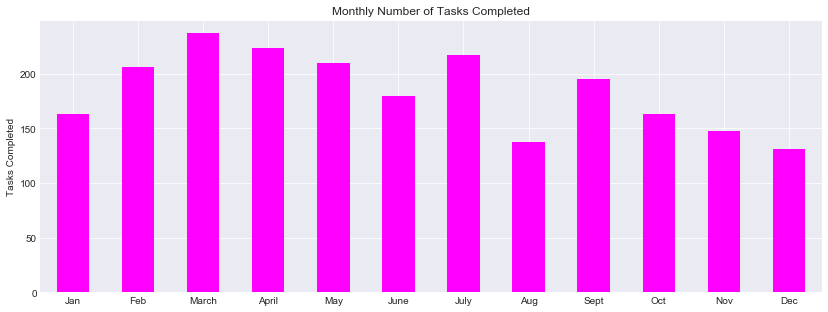

In [25]:
yearly_months_chart(year=target_year)

#### Year: Tasks Heat Map

In [26]:
# Helper Function to Create Heat Map from Data
# Adapted from https://stackoverflow.com/questions/32485907/matplotlib-and-numpy-create-a-calendar-heatmap
DAYS = ['Sun.', 'Mon.', 'Tues.', 'Wed.', 'Thurs.', 'Fri.', 'Sat.']
MONTHS = ['Jan.', 'Feb.', 'Mar.', 'Apr.', 'May', 'June', 'July', 'Aug.', 'Sept.', 'Oct.', 'Nov.', 'Dec.']


def date_heatmap(series, start=None, end=None, mean=False, ax=None, **kwargs):
    '''Plot a calendar heatmap given a datetime series.

    Arguments:
        series (pd.Series):
            A series of numeric values with a datetime index. Values occurring
            on the same day are combined by sum.
        start (Any):
            The first day to be considered in the plot. The value can be
            anything accepted by :func:`pandas.to_datetime`. The default is the
            earliest date in the data.
        end (Any):
            The last day to be considered in the plot. The value can be
            anything accepted by :func:`pandas.to_datetime`. The default is the
            latest date in the data.
        mean (bool):
            Combine values occurring on the same day by mean instead of sum.
        ax (matplotlib.Axes or None):
            The axes on which to draw the heatmap. The default is the current
            axes in the :module:`~matplotlib.pyplot` API.
        **kwargs:
            Forwarded to :meth:`~matplotlib.Axes.pcolormesh` for drawing the
            heatmap.

    Returns:
        matplotlib.collections.Axes:
            The axes on which the heatmap was drawn. This is set as the current
            axes in the `~matplotlib.pyplot` API.
    '''
    # Combine values occurring on the same day.
    dates = series.index.floor('D')
    group = series.groupby(dates)
    series = group.mean() if mean else group.sum()

    # Parse start/end, defaulting to the min/max of the index.
    start = pd.to_datetime(start or series.index.min())
    end = pd.to_datetime(end or series.index.max())

    # We use [start, end) as a half-open interval below.
    end += np.timedelta64(1, 'D')

    # Get the previous/following Sunday to start/end.
    # Pandas and numpy day-of-week conventions are Monday=0 and Sunday=6.
    start_sun = start - np.timedelta64((start.dayofweek + 1) % 7, 'D')
    end_sun = end + np.timedelta64(7 - end.dayofweek - 1, 'D')

    # Create the heatmap and track ticks.
    num_weeks = (end_sun - start_sun).days // 7
    heatmap = np.zeros((7, num_weeks))
    ticks = {}  # week number -> month name
    for week in range(num_weeks):
        for day in range(7):
            date = start_sun + np.timedelta64(7 * week + day, 'D')
            if date.day == 1:
                ticks[week] = MONTHS[date.month - 1]
            if date.dayofyear == 1:
                ticks[week] += f'\n{date.year}'
            if start <= date < end:
                heatmap[day, week] = series.get(date, 0)

    # Get the coordinates, offset by 0.5 to align the ticks.
    y = np.arange(8) - 0.5
    x = np.arange(num_weeks + 1) - 0.5

    # Plot the heatmap. Prefer pcolormesh over imshow so that the figure can be
    # vectorized when saved to a compatible format. We must invert the axis for
    # pcolormesh, but not for imshow, so that it reads top-bottom, left-right.
    ax = ax or plt.gca()
    mesh = ax.pcolormesh(x, y, heatmap, **kwargs)
    ax.invert_yaxis()

    # Set the ticks.
    ax.set_xticks(list(ticks.keys()))
    ax.set_xticklabels(list(ticks.values()))
    ax.set_yticks(np.arange(7))
    ax.set_yticklabels(DAYS)

    # Set the current image and axes in the pyplot API.
    plt.sca(ax)
    plt.sci(mesh)

    return ax

In [27]:
def year_heat_chart(year):   

    # Filter by Year
    year_data = tasks[(tasks['year'] == year)]
    
    # daily count
    year_dates_data = year_data['date'].value_counts().reset_index()
    year_dates_data.columns = ['date', 'count']
    year_dates_data['date'] = pd.to_datetime(year_dates_data['date'])

    # Generate all dates in that year
    first_date = str(year)+'-01-01'
    last_date = str(year)+'-12-31'
    all_dates = pd.date_range(start=first_date, end=last_date)
    all_dates = pd.DataFrame(all_dates, columns=['date'])
    
    # combine actual runs by date with total dates possible
    year_data = pd.merge(left=all_dates, right=year_dates_data, 
                                 left_on="date", right_on="date", how="outer")
    year_data['count'].fillna(0, inplace=True)
    year_data = year_data.set_index(pd.DatetimeIndex(year_data['date']))
    
    max_daily_count = round(year_data['count'].max(),2)
    
    # key stat and title
    total_tasks = round(year_data['count'].sum())
    chart_title = '{} Todoist Tasks Heatmap | Total Tasks: {:,}'.format(year, total_tasks)
    
    # set chart data
    data = year_data['count']
    data.index = year_data.index 
    
    # plot data
    figsize = plt.figaspect(7 / 56)
    fig = plt.figure(figsize=figsize)
    ax = date_heatmap(data, edgecolor='black')
    max_count = int(round(data.max(),0))
    steps = int(round(max_count / 6, 0))
    plt.colorbar(ticks=range(0, max_count, steps), pad=0.02)
    cmap = mpl.cm.get_cmap('Purples', max_daily_count)
    plt.set_cmap(cmap)
    plt.clim(0, max_daily_count)
    ax.set_aspect('equal')
    ax.set_title(chart_title)
    plt.show()

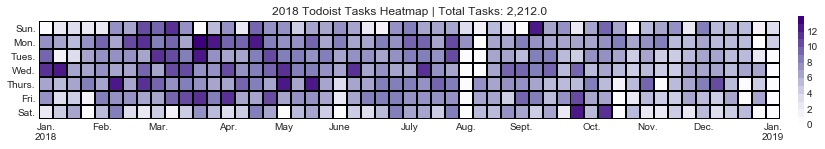

In [28]:
year_heat_chart(year=target_year)

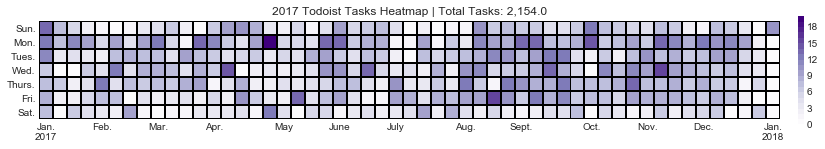

In [29]:
# compare previous year: 
year_heat_chart(year=2017)

### Yearly Summary

In [30]:
def yearly_summary(year):  
    print('====== {} Todoist Summary ======'.format(year))
    # Data Setup
    year_data = tasks[(tasks['year'] == year)]
    
    print('Total Tasks Completed: {:,}'.format(len(year_data)))
    
    daily_counts = year_data['date'].value_counts().sort_index()
    
    daily_average = round(daily_counts.mean(),1)
    print('Daily Task Average: {:,}'.format(daily_average))
    print(' ')
    project_counts = year_data['project_name'].value_counts()
    print('=== Top Projects ===')
    for i, v in project_counts.sort_values(ascending=False).head(7).items():
        print("* ", v, 'tasks on ', i)
    
    print(' ')
    print('=== Monthly Breakdown ===')
    monthly_counts = year_data['month'].value_counts().sort_index()
    print('Monthly Task Average: {:,}'.format(round(monthly_counts.mean(),1)))
    print('> Top 3 Months:')
    for i, v in monthly_counts.sort_values(ascending=False).head(3).items():
        print("* ", v, 'tasks on ', i)
    print('> Bottom 3 Months:')
    for i, v in monthly_counts.sort_values(ascending=True).head(3).items():
        print("* ", v, 'tasks on ', i)   
    print(' ')
    print('Top 5 Days with Most Tasks Completed:')
    for i, v in daily_counts.sort_values(ascending=False).head(5).items():
        print("* ", v, 'tasks on ', i)

In [31]:
yearly_summary(year=target_year)

====== 2018 Todoist Summary ======
Total Tasks Completed: 2,212
Daily Task Average: 6.4
 
=== Top Projects ===
*  395 tasks on  Data-Driven You
*  284 tasks on  Code Studies
*  238 tasks on  BookLoversCon
*  187 tasks on  Productivity, Self-Tracking
*  146 tasks on  Studies: General
*  127 tasks on  Writing
*  107 tasks on  Networking / Career
 
=== Monthly Breakdown ===
Monthly Task Average: 184.3
> Top 3 Months:
*  237 tasks on  2018-03
*  224 tasks on  2018-04
*  217 tasks on  2018-07
> Bottom 3 Months:
*  131 tasks on  2018-12
*  138 tasks on  2018-08
*  148 tasks on  2018-11
 
Top 5 Days with Most Tasks Completed:
*  14 tasks on  2018-03-19
*  12 tasks on  2018-03-20
*  12 tasks on  2018-03-26
*  12 tasks on  2018-01-10
*  12 tasks on  2018-05-17
